### Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
bike_rentals = pd.read_csv('bike_rental_hour.csv')

In [3]:
bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Analyzing the data

In [4]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb53b9e9f60>]],
      dtype=object)

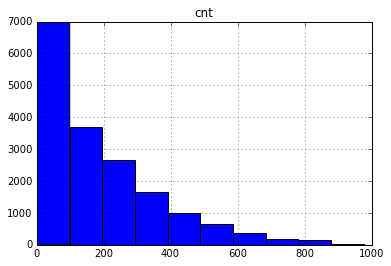

In [6]:
bike_rentals.hist(column= 'cnt')

In [7]:
# correlation
bike_rentals.corr()['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [8]:
# Define function to assign labels
def assign_label(hour):
    if hour >=0 and hour < 6:
        return 4
    elif hour >=6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour <=24:
        return 3

bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

### Divide between training and testing data

In [9]:
train = bike_rentals.sample(frac = 0.8)

In [10]:
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

### Linear Regression Model

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
predictors = list(train.columns)
predictors.remove('cnt')
predictors.remove('casual')
predictors.remove('registered')
predictors.remove('dteday')
# Fit model
model = LinearRegression()
model.fit(train[predictors], train['cnt'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
# Model predictions
predictions = model.predict(test[predictors])

In [14]:
# Mean Squared Error
mse =np.mean((predictions - test['cnt']) ** 2)
mse

16683.699044258476

The error is very high, which may be due to the fact that the data has a few extremely high rental counts, but otherwise mostly low counts. Larger errors are penalized more with MSE, which leads to a higher total error.

### Decision Tree Regressor

In [15]:
from sklearn.tree import DecisionTreeRegressor

In [16]:
reg = DecisionTreeRegressor(min_samples_leaf=2)

In [17]:
reg.fit(train[predictors], train['cnt']) # fit model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [18]:
pred = reg.predict(test[predictors]) # model predictions

In [19]:
mse_reg =np.mean((pred - test['cnt']) ** 2) # mean squared error
mse_reg

3048.200621723565

By taking the nonlinear predictors into account, the decision tree regressor appears to have much higher accuracy than linear regression.

### Random Forest Regressor

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
rfg = RandomForestRegressor(min_samples_leaf=5)

In [29]:
rfg.fit(train[predictors], train['cnt']) # fit model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [30]:
pred = rfg.predict(test[predictors]) # model predictions

In [31]:
mse_rfg =np.mean((pred - test['cnt']) ** 2) # mean squared error
mse_rfg

2087.7271624953755

By removing some of the sources of overfitting, the random forest accuracy is improved over the decision tree accuracy.